In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


```python
import keras
```

- `keras` : C'est une bibliothèque d'apprentissage automatique de haut niveau qui offre une interface conviviale pour la création de modèles de réseaux de neurones. Cependant, à partir de TensorFlow 2.0, Keras a été intégré en tant qu'API de haut niveau dans TensorFlow, ce qui signifie que vous pouvez également utiliser les fonctionnalités de Keras directement à partir de TensorFlow. Vous pouvez créer des modèles de réseaux de neurones en utilisant la classe `Sequential` ou `Model` de Keras.

```python
import tensorflow as tf
from tensorflow import keras
```

- `tf` : `tf` est un alias couramment utilisé pour `tensorflow`. Il est utilisé pour rendre les appels à TensorFlow plus concis.

- `keras` : Cette importation est nécessaire pour utiliser les fonctionnalités de Keras directement à partir de TensorFlow.

```python
from keras.models import Sequential
```

- `Sequential` : C'est une classe de Keras qui permet de créer un modèle de réseau de neurones en empilant des couches de manière séquentielle. Par exemple, `model = Sequential()` crée un modèle vide auquel vous pouvez ajouter des couches.

```python
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
```

- `Input` : Cette classe de couche de Keras permet de définir une couche d'entrée pour le modèle.

- `Conv2D` : Cette classe de couche de Keras représente une couche de convolution 2D, couramment utilisée dans les réseaux de neurones convolutifs (CNN).

- `Dense` : Cette classe de couche de Keras représente une couche dense (complètement connectée), couramment utilisée dans les réseaux de neurones.

- `Flatten` : Cette classe de couche de Keras est utilisée pour aplatir les données, généralement avant une couche dense.

- `Dropout` : Cette classe de couche de Keras permet d'appliquer une régularisation de type dropout, ce qui peut aider à prévenir le surajustement du modèle.

```python
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
```

- `GlobalMaxPooling2D` : Cette classe de couche de Keras permet de réaliser un pooling global maximum sur une carte de caractéristiques 2D.

- `MaxPooling2D` : Cette classe de couche de Keras représente une couche de pooling maximum 2D, couramment utilisée pour réduire la dimension des cartes de caractéristiques dans un CNN.

```python
from tensorflow.keras.layers import BatchNormalization
```

- `BatchNormalization` : Cette classe de couche de Keras est utilisée pour la normalisation par lots, ce qui améliore la stabilité et l'entraînement des réseaux de neurones.

```python
from tensorflow.keras.models import Model
```

- `Model` : Cette classe de Keras permet de créer des modèles de réseaux de neurones plus complexes que ceux basés sur la classe `Sequential`. Elle est couramment utilisée pour créer des modèles avec plusieurs entrées ou sorties.

```python
from tensorflow.keras import regularizers, optimizers
```

- `regularizers` : Ce module contient des régularisations que vous pouvez appliquer aux couches de votre modèle pour prévenir le surajustement.

- `optimizers` : Ce module contient différents optimiseurs que vous pouvez utiliser pour ajuster les poids de votre modèle pendant l'entraînement, tels que Adam, SGD, etc.

```python
from tensorflow.keras.utils import to_categorical
```

- `to_categorical` : Cette fonction permet de convertir des étiquettes de classe en encodage one-hot, ce qui est utile pour la classification multiclasse.

Ces imports sont couramment utilisés dans la création de modèles de réseaux de neurones en utilisant TensorFlow et Keras. Ils fournissent les outils et les couches nécessaires pour construire et entraîner des modèles d'apprentissage automatique.

In [11]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

In [14]:
from sklearn.metrics import accuracy_score

# Description du dataset
Le dataset CIFAR-10 (Canadian Institute For Advanced Research 10) est un ensemble de données couramment utilisé en vision par ordinateur pour des tâches de classification d'images. Il est largement utilisé pour évaluer et tester des algorithmes d'apprentissage automatique, en particulier des modèles de réseaux de neurones convolutionnels (CNN). Voici une description détaillée du dataset CIFAR-10 :

- **Nombre de classes** : Le dataset CIFAR-10 contient un total de 10 classes d'objets différents. Chaque classe représente une catégorie d'objets distincte.

- **Nombre d'images** : Il se compose de 60 000 images au total, réparties également entre les 10 classes. Chaque classe compte 6 000 images.

- **Résolution des images** : Les images du CIFAR-10 ont une résolution de 32x32 pixels. Elles sont relativement petites par rapport à d'autres ensembles de données, ce qui les rend adaptées à des expériences rapides en apprentissage automatique.

- **Classes** : Les 10 classes du CIFAR-10 sont les suivantes :
  1. Avion
  2. Automobile
  3. Oiseau
  4. Chat
  5. Cerf
  6. Chien
  7. Grenouille
  8. Cheval
  9. Bateau
  10. Camion

- **Variabilité** : Les images de chaque classe présentent une grande variabilité en termes de pose, d'orientation, d'éclairage et de fond, ce qui en fait un défi intéressant pour la classification.

- **Répartition des données** : Le dataset CIFAR-10 est divisé en deux sous-ensembles principaux : un ensemble d'entraînement (train) composé de 50 000 images et un ensemble de test (test) de 10 000 images. Les données d'entraînement sont utilisées pour entraîner les modèles, tandis que les données de test servent à évaluer la performance des modèles.

- **Difficulté** : Le CIFAR-10 est considéré comme un ensemble de données de difficulté modérée en raison de la variabilité des images et du fait que certaines classes se ressemblent, ce qui peut compliquer la tâche de classification.

Le dataset CIFAR-10 est un choix populaire pour l'apprentissage automatique en vision par ordinateur en raison de sa taille gérable, de la diversité des classes et de la possibilité de tester et de comparer différents modèles d'apprentissage profond. Il est souvent utilisé pour l'entraînement et l'évaluation de modèles CNN en raison de sa taille et de sa complexité appropriées pour des projets d'apprentissage automatique.

In [15]:
from tensorflow.keras.datasets import cifar10

In [16]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 125s 1us/step


## observation des données

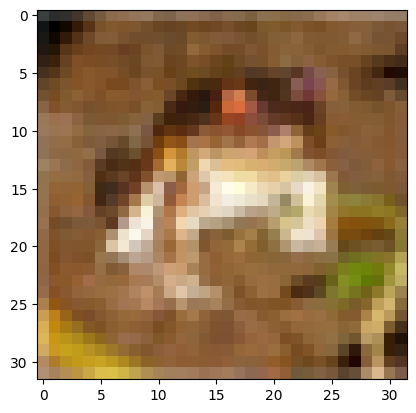

In [17]:
plt.imshow(x_train[0])

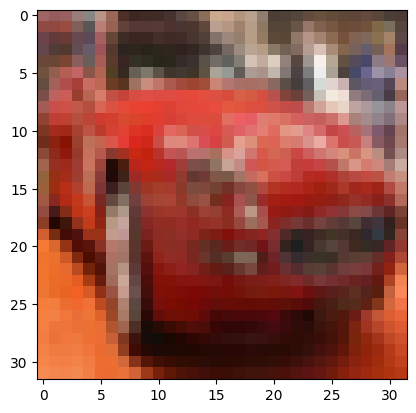

In [19]:
plt.imshow(x_train[5])

In [20]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Preprossing

In [21]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train

 `to_categorical(y_train, num_classes)` :
   - Cette fonction provient de la bibliothèque Keras, en particulier de `keras.utils`.
   - `y_train` : C'est la liste (ou tableau) des étiquettes de classe de l'ensemble d'entraînement.
   - `num_classes` : Il s'agit du nombre total de classes dans votre problème de classification. Dans cet exemple, il est défini sur 10, ce qui signifie qu'il y a 10 classes différentes.
   - La fonction `to_categorical` prend les étiquettes `y_train` et les convertit en encodage one-hot. Chaque étiquette est transformée en un vecteur binaire de longueur `num_classes`, où une seule valeur est définie à 1 (représentant la classe correcte) et toutes les autres valeurs sont définies à 0.

In [23]:
y_train_en = to_categorical(y_train,10)
y_test_en = to_categorical(y_test,10)

In [24]:
y_train_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Model 



1. `model = Sequential()` :
   - Cette ligne crée un modèle de réseau de neurones en utilisant la classe `Sequential` de Keras.
   - Un modèle séquentiel est un modèle de réseau de neurones qui permet de définir une séquence linéaire de couches. Chaque couche est ajoutée à la suite de la précédente.

2. `model.add(Conv2D(32, (4, 4), input_shape=(32, 32, 3), activation='relu'))` :
   - Cette ligne ajoute une couche de convolution 2D au modèle.
   - `32` : Cela spécifie le nombre de filtres (ou noyaux) de la couche de convolution. Chaque filtre extrait des caractéristiques de l'image en appliquant des opérations de convolution.
   - `(4, 4)` : Cela spécifie la taille du noyau de convolution (4x4).
   - `input_shape=(32, 32, 3)` : Cela définit la forme de l'entrée attendue. Dans cet exemple, il s'agit d'images en couleur de 32x32 pixels, où chaque pixel a 3 canaux (rouge, vert, bleu).
   - `activation='relu'` : C'est la fonction d'activation ReLU (Rectified Linear Unit) appliquée après la convolution. Elle est couramment utilisée pour introduire une non-linéarité dans le modèle.

3. `model.add(MaxPooling2D(pool_size=(2, 2))` :
   - Cette ligne ajoute une couche de pooling maximum 2D au modèle.
   - `pool_size=(2, 2)` : Cela spécifie la taille de la fenêtre de pooling (2x2). Le pooling maximum réduit la dimension spatiale de l'image en conservant la valeur maximale dans chaque région de la fenêtre de pooling.

4. `model.add(Conv2D(32, (4, 4), input_shape=(32, 32, 3), activation='relu'))` :
   - Cette ligne ajoute une deuxième couche de convolution 2D au modèle. Elle suit le même modèle que la première couche, mais avec des paramètres distincts.

5. `model.add(MaxPooling2D(pool_size=(2, 2))` :
   - Cette ligne ajoute une deuxième couche de pooling maximum 2D au modèle, à la suite de la deuxième couche de convolution.

In [25]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
```python
model.add(Flatten())
```

- `Flatten()` : Cette ligne ajoute une couche de "Flatten" au modèle.
   - La couche `Flatten` est utilisée pour aplatir les données en une seule dimension. Elle prend en entrée les données 2D ou 3D (comme les images) et les transforme en un vecteur 1D.
   - Cette opération est couramment utilisée entre les couches de convolution et les couches complètement connectées (dense) dans un modèle de réseau de neurones. Elle permet de prendre les caractéristiques spatiales extraites par les couches de convolution et de les aplatir en un vecteur pour l'entrée des couches denses.
   - Par exemple, si les données d'entrée sont des images de 32x32 pixels avec 3 canaux de couleur, la couche `Flatten` les transformera en un vecteur de 32 * 32 * 3 = 3072 éléments, qui sera ensuite passé aux couches denses du modèle.
   - La couche `Flatten` n'a pas de paramètres à apprendre, elle effectue simplement une opération de réorganisation des données.

In [26]:
model.add(Flatten())

1. `model.add(Dense(128, activation='relu'))` :
   - Cette ligne ajoute une couche dense (complètement connectée) au modèle.
   - `Dense(128)` : Cela spécifie que la couche dense a 128 neurones (unités). Chaque neurone est complètement connecté à tous les neurones de la couche précédente.
   - `activation='relu'` : C'est la fonction d'activation ReLU (Rectified Linear Unit) appliquée à chaque neurone de la couche. Le ReLU est couramment utilisé pour introduire une non-linéarité dans le modèle.

2. `model.add(Dense(10, activation='softmax'))` :
   - Cette ligne ajoute une autre couche dense au modèle.
   - `Dense(10)` : Cela spécifie que la couche dense a 10 neurones. Dans ce cas, il est courant d'utiliser une couche dense de 10 neurones pour les problèmes de classification multiclasse, où il y a 10 classes distinctes.
   - `activation='softmax'` : La fonction d'activation softmax est utilisée dans la couche de sortie d'un modèle de classification multiclasse. Elle transforme les valeurs de sortie en une distribution de probabilité sur les différentes classes, de telle sorte que la somme des probabilités soit égale à 1. Cela permet de prédire la classe la plus probable.

Ces deux lignes de code ajoutent des couches complètement connectées à votre modèle de réseau de neurones après les couches de convolution et de pooling. La première couche dense a 128 neurones avec une fonction d'activation ReLU, tandis que la deuxième couche dense a 10 neurones avec une fonction d'activation softmax pour la classification multiclasse. Ces couches denses sont responsables de la prise des caractéristiques extraites précédemment par les couches de convolution et de générer des prédictions finales pour les classes cibles.

In [27]:
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

```python
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```

- `model.compile` : Cette méthode est utilisée pour compiler le modèle de réseau de neurones avec les paramètres spécifiés. Lorsque vous compilez un modèle, vous définissez des aspects essentiels de l'entraînement du réseau.

- `loss='categorical_crossentropy'` : Cela spécifie la fonction de perte (ou loss function) à utiliser pour évaluer la disparité entre les prédictions du modèle et les vraies étiquettes (labels). Dans ce cas, "categorical_crossentropy" est spécifiée, ce qui est couramment utilisé pour des problèmes de classification multiclasse. Cette fonction de perte est adaptée aux tâches où chaque échantillon d'entraînement peut appartenir à une seule classe parmi plusieurs classes.

- `optimizer='adam'` : Cela spécifie l'optimiseur à utiliser pour ajuster les poids du modèle lors de l'entraînement. "Adam" est un optimiseur populaire et efficace qui s'adapte de manière adaptative aux taux d'apprentissage pour accélérer la convergence de l'entraînement.

- `metrics=['accuracy']` : Cela spécifie les métriques (ou indicateurs de performance) à surveiller pendant l'entraînement du modèle. Dans ce cas, la métrique "accuracy" (précision) est utilisée pour évaluer la précision des prédictions du modèle par rapport aux étiquettes réelles.

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

La sortie de `model.summary()` fournit des informations sur l'architecture du modèle de réseau de neurones, en particulier sur les couches et le nombre de paramètres. Voici une explication de chaque partie de la sortie :

- "Model: "sequential"" : Cela indique que le modèle est de type séquentiel, ce qui signifie que les couches sont empilées les unes sur les autres de manière séquentielle.

- Les lignes commençant par "Layer (type)" décrivent les différentes couches du modèle, leur type et leur configuration. Voici ce que signifient les éléments dans chaque ligne :

  - "conv2d (Conv2D)" : Il s'agit d'une couche de convolution 2D avec le nom "conv2d". Le type de la couche est "Conv2D". La couche utilise 32 filtres (ou noyaux) de taille (4, 4), ce qui est spécifié par "Output Shape". Cette couche a 1 568 paramètres à apprendre.

  - "max_pooling2d (MaxPooling2D)" : Il s'agit d'une couche de pooling maximum 2D avec le nom "max_pooling2d". Le type de la couche est "MaxPooling2D". La couche effectue le pooling sur les données de sortie de la couche précédente. La forme de sortie est réduite à (14, 14, 32) après l'application de cette couche. Cette couche n'a pas de paramètres à apprendre.

  - "conv2d_1 (Conv2D)" : C'est une deuxième couche de convolution 2D avec le nom "conv2d_1". Elle a 32 filtres de taille (4, 4) et 16 416 paramètres.

  - "max_pooling2d_1 (MaxPooling2D)" : Il s'agit d'une deuxième couche de pooling maximum 2D avec le nom "max_pooling2d_1". Elle réduit la forme de sortie à (5, 5, 32) et n'a pas de paramètres à apprendre.

  - "flatten (Flatten)" : C'est une couche de "Flatten" qui transforme les données en un vecteur 1D de longueur 800. Elle n'a pas de paramètres à apprendre.

  - "dense (Dense)" : Cette couche dense (complètement connectée) a 128 neurones et 102 528 paramètres à apprendre.

  - "dense_1 (Dense)" : C'est une autre couche dense avec 10 neurones, ce qui est typique pour la classification multiclasse. Elle a 1 290 paramètres.

- "Total params" : Il s'agit du nombre total de paramètres dans le modèle. Dans ce cas, il y a un total de 121 802 paramètres à apprendre.

- "Trainable params" : Il s'agit du nombre de paramètres que le modèle peut apprendre pendant l'entraînement. Dans ce modèle, tous les paramètres sont entraînables.

- "Non-trainable params" : Il s'agit du nombre de paramètres qui ne sont pas modifiables pendant l'entraînement. Dans ce modèle, il n'y a aucun paramètre non entraînable.

- "Output Shape" : Cela indique la forme de la sortie de chaque couche du modèle, en spécifiant les dimensions.

Cette sortie est utile pour comprendre la complexité du modèle, le nombre de paramètres à entraîner et la structure des différentes couches. Elle peut également aider à identifier d'éventuels problèmes, tels que des couches avec un grand nombre de paramètres.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

# Entrainement du model
Le code que vous avez fourni effectue l'entraînement d'un modèle de réseau de neurones à l'aide des données d'entraînement et de validation. Voici la documentation pour cette ligne de code :

- `history = model.fit(x_train, y_train_en, epochs=20, verbose=1, validation_data=(x_test, y_test_en))` :
   - `model.fit` : Cette méthode est utilisée pour entraîner un modèle de réseau de neurones. Elle prend en compte les données d'entraînement (`x_train` et `y_train_en`) et les paramètres spécifiés pour l'entraînement.

   - `x_train` : C'est l'ensemble des données d'entraînement, généralement les caractéristiques (features) de l'ensemble d'apprentissage.

   - `y_train_en` : C'est l'ensemble des étiquettes (labels) correspondant aux données d'entraînement. Les étiquettes sont généralement encodées en "one-hot encoding" pour la classification multiclasse.

   - `epochs=20` : Cela spécifie le nombre d'itérations (epochs) d'entraînement. Dans cet exemple, le modèle sera entraîné pendant 20 epochs, ce qui signifie qu'il parcourra l'ensemble de données d'entraînement 20 fois pour ajuster les poids.

   - `verbose=1` : C'est un indicateur de la verbosité de la sortie pendant l'entraînement. Lorsque `verbose=1`, il affiche des informations détaillées pendant l'entraînement, telles que la progression de l'apprentissage à chaque epoch.

   - `validation_data=(x_test, y_test_en)` : Cela spécifie les données de validation à utiliser pour évaluer la performance du modèle pendant l'entraînement. Les données de test (`x_test` et `y_test_en`) sont utilisées pour évaluer le modèle à chaque epoch et calculer les métriques de validation.

   - `history` : Cette variable stocke les informations d'entraînement telles que les valeurs de perte (loss) et les métriques à chaque epoch. Elle permet de suivre la performance du modèle au fil de l'entraînement.

In [32]:
history = model.fit(x_train, y_train_en, epochs=20,verbose=1,validation_data=(x_test,y_test_en))

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4970 - accuracy: 0.4554 - val_loss: 1.3962 - val_accuracy: 0.5027
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1610 - accuracy: 0.5923 - val_loss: 1.1720 - val_accuracy: 0.5977
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0220 - accuracy: 0.6441 - val_loss: 1.0676 - val_accuracy: 0.6294
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9326 - accuracy: 0.6746 - val_loss: 0.9904 - val_accuracy: 0.6563
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8598 - accuracy: 0.6993 - val_loss: 0.9840 - val_accuracy: 0.6669
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7969 - accuracy: 0.7228 - val_loss: 0.9410 - val_accuracy: 0.6782
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7465 - accuracy: 0.7396 - val_loss: 0.9618 - val_accuracy